In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

plt.style.use("ggplot")


In [2]:
train = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/train.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1503422828&Signature=JXqBiLL8bUS34O18kZZRCsTNCvK5CMUYezZAwb0iI4suPncKB8%2BxhIuceE7ovgoYnavmLkfbY0srQIpaQybv9FJHPD6DhyVbTRzRQNX2LM8fuDgVTFSGEfgO%2BbPnIl%2BHjMoi24Ijd7kNpbaI8MoQ4qG8m%2F8Suhw4lBPb%2BBkpsQVyHXl4KVuIEqDHuAR%2BONZLB5ui8%2FPhK0lrchAoOJ%2FAQLPRP4qRsHOqz59diuiSeXe3GQyylkdpB4SH2t3X7hwFqrgUZH%2B8olZ%2Br4N9woDOB2cP90VQKKv%2Fn0tDNTwrWQu4gPhrqDrA5oHsRDMud1AJTj1VlfpERIvnKC8gFDJQgA%3D%3D")
test = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/test.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1503426681&Signature=KJmxr2omtAs29eDmKk9gA67h2MK7Bdkzobu5CKzZNwzclBCwD%2F%2BzNt5IDanHEP2qjHw5OWAhwGfDZDHQbaFhdM%2FYw90nDXXZS0JflAt2ndaCOtGfPBjbL4GYZ6T5ZFucq1lAkxMfgvOUO2STSAW%2Fi3i9nVD%2BanIbi5n3LcSgJHoiQ%2FjMqT42V%2FRrNrfpRl69TnBRtoh0Z4NqZmY6l5SoitdOpqdDkYkr2YmmPFodQDhOn2vZ6S%2B%2FWK%2B7%2Fa%2FQVypbFhMNHEMNHkX6XU2fq3PgASE4Ys0cMvVNf2BZ1VisX4v5OsFvuN60wH532P%2BwRk3wxw6%2BR1hH7DruoxQUtRvMBQ%3D%3D")

In [3]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


There are 81 columns in train. Before going into features lets check our Target column which is Sale Price

In [4]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From above we can determine that dont have any null values and also mean value is 18000

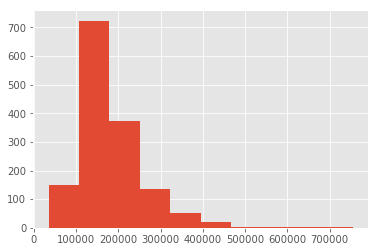

In [5]:
train["SalePrice"].hist()
plt.show()

We can see from above plot that our target value is skewed completely towards right. We will work on normal distribution for our target variable

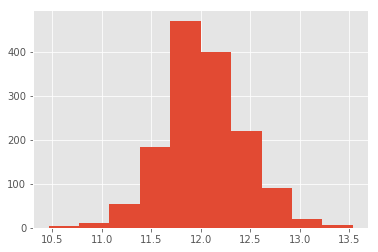

In [6]:
target = np.log(train["SalePrice"])
target.hist()
plt.show()

Now we have normal distribution. Lets check each features. I always start selecting my feature by intially checking relation between features and Target 

In [7]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending = False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We see there are quite a few which are linearly dependent. We will start with Overall Quality and check top 5 in detail.
Note - We will get Correlation only for numerical values. We are only considering numerical columns as of now. As we go furthur we will be considering non-numeric and how to convert them to numeric

columns = ["BsmtFinSF2","BsmtHalfBath","MiscVal","LowQualFinSF","YrSold","OverallCond","MSSubClass","EnclosedPorch","KitchenAbvGr"]

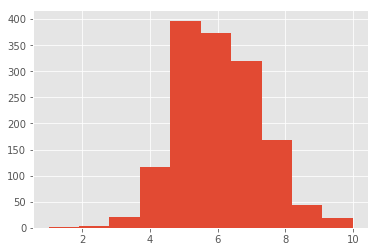

In [8]:
train["OverallQual"].hist()
plt.show()

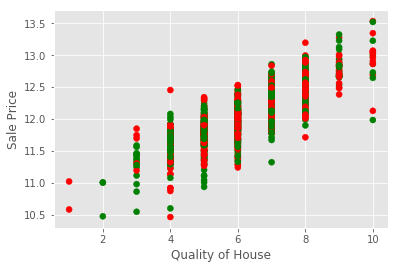

In [9]:
plt.scatter(train["OverallQual"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('Quality of House')
plt.show()

We can see from above plot, as quality increase price range increase, Lets check next correaltion - GrLivArea
From description we can see GrLivArea is described as - GrLivArea - GrLivArea: Above grade (ground) living area square feet

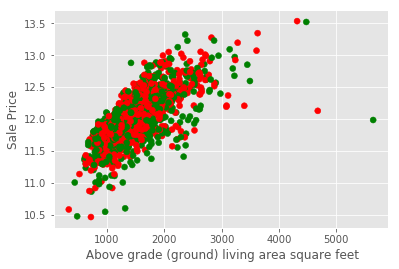

In [10]:
plt.scatter(train["GrLivArea"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel(' Above grade (ground) living area square feet')
plt.show()

we will remove any area square foor that is greater than 5000 from train as there are out of our plot and not linearly correlated

In [11]:
train = train[train["GrLivArea"] < 5000]
target = np.log(train["SalePrice"])

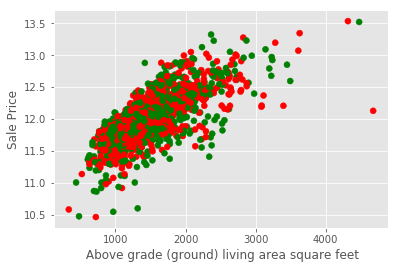

In [12]:
plt.scatter(train["GrLivArea"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel(' Above grade (ground) living area square feet')
plt.show()

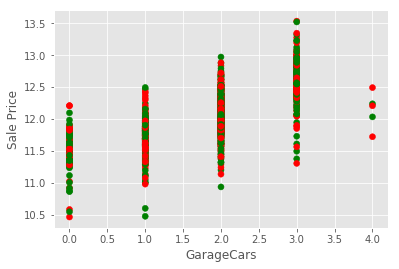

In [13]:
plt.scatter(train["GarageCars"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('GarageCars')
plt.show()

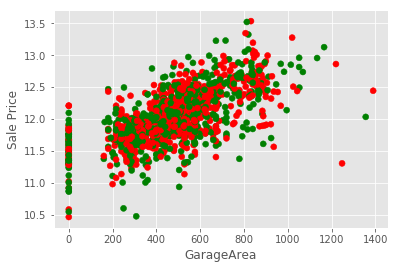

In [14]:
plt.scatter(train["GarageArea"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

In [15]:
train = train[train["GarageArea"] < 1200]
target = np.log(train["SalePrice"])

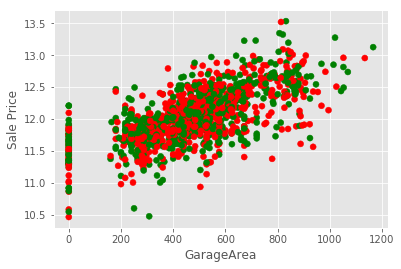

In [16]:
plt.scatter(train["GarageArea"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

plt.scatter(train["TotalBsmtSF"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

In [17]:
train = train[train["TotalBsmtSF"] <2500]
target = np.log(train["SalePrice"])

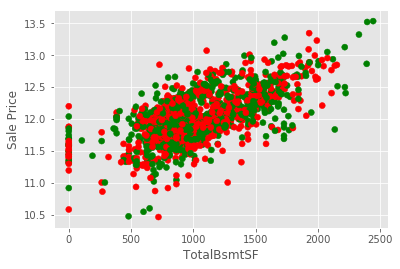

In [18]:
plt.scatter(train["TotalBsmtSF"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()

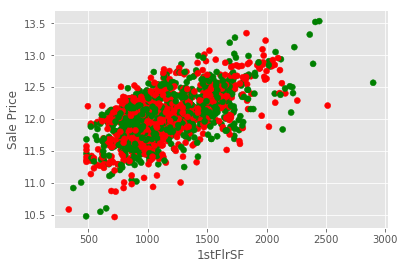

In [19]:
plt.scatter(train["1stFlrSF"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')
plt.show()

In [20]:
train = train[train["1stFlrSF"] <2500]
target = np.log(train["SalePrice"])

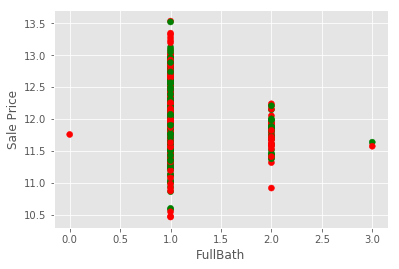

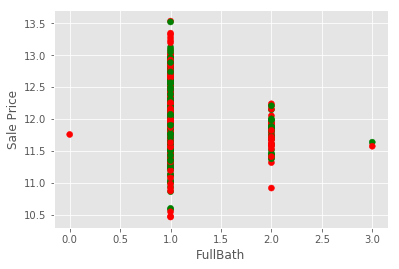

In [21]:
plt.scatter(train["KitchenAbvGr"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('FullBath')
plt.show()

plt.scatter(train["KitchenAbvGr"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('FullBath')
plt.show()

In [22]:
train = train[train["KitchenAbvGr"] <2.5]
target = np.log(train["SalePrice"])
corr = train.corr()
corr["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.792038
GrLivArea        0.734303
GarageCars       0.645904
GarageArea       0.641636
TotalBsmtSF      0.639602
1stFlrSF         0.622083
FullBath         0.563440
TotRmsAbvGrd     0.537633
YearBuilt        0.522082
YearRemodAdd     0.509456
GarageYrBlt      0.487306
MasVnrArea       0.480301
Fireplaces       0.463623
BsmtFinSF1       0.393827
LotFrontage      0.368222
2ndFlrSF         0.340077
WoodDeckSF       0.326729
OpenPorchSF      0.322461
HalfBath         0.292207
LotArea          0.271264
BsmtFullBath     0.219133
BsmtUnfSF        0.205486
BedroomAbvGr     0.174798
ScreenPorch      0.107071
PoolArea         0.102343
MoSold           0.054874
3SsnPorch        0.046829
BsmtHalfBath    -0.014554
MiscVal         -0.019702
Id              -0.023153
BsmtFinSF2      -0.024729
LowQualFinSF    -0.024834
YrSold          -0.030877
MSSubClass      -0.073180
OverallCond     -0.075557
KitchenAbvGr    -0.134439
EnclosedPorch   -0.141985
Name: SalePr

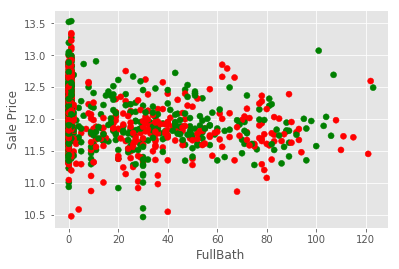

In [23]:
plt.scatter((train["YearRemodAdd"]-train["YearBuilt"]),target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('FullBath')
plt.show()

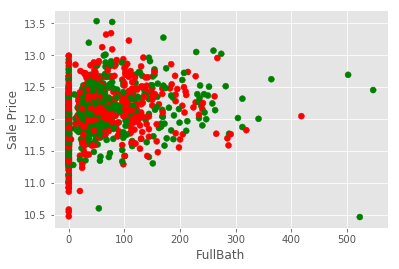

In [24]:
plt.scatter(train["OpenPorchSF"],target,color = ('g','r'))
plt.ylabel('Sale Price')
plt.xlabel('FullBath')
plt.show()

In [25]:
train = train[train["OpenPorchSF"] <400]
target = np.log(train["SalePrice"])

Before analyzing all other features, lets see how our prediction is . We will divide our training set into training and test and we will calculate rmse. Before building our model. Lets prepare our features, we will use sklearn for this. We need to change all the columns to numerical values. Lets now consider only features are non numeric

In [26]:

data = train.drop("SalePrice",axis = 1)

col = ["PoolArea"]
data = data.append(test)
data = data.drop(col,axis = 1)

columns = data.select_dtypes(include = ['object']).head()

print(columns)

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1      ...      GarageType GarageFinish GarageQual  \
0      CollgCr       Norm      ...          Attchd          RFn         TA   
1      Veenker      Feedr      ...          Attchd          RFn         TA   
2      CollgCr       Norm      ...          Attchd          RFn         TA   
3      Crawfor       Norm      ...          Detchd          Unf         TA   
4      NoRidge       Norm      ...          Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType Sale

In [27]:
print(train.shape[0],test.shape)



1441 (1459, 80)


In [28]:
for row in columns:
    dummy = pd.get_dummies(data[row],prefix = row )
    data = pd.concat([dummy,data],axis = 1)
    data = data.drop(row,axis = 1)

train_data = data[0:train.shape[0]]
test_data = data[train.shape[0]:]


In [29]:
print(train_data.shape,test_data.shape)

(1441, 287) (1459, 287)


In [30]:
train1 = train
for row in columns:
    dummy = pd.get_dummies(train1[row],prefix = row )
    train1 = pd.concat([dummy,train1],axis = 1)
    train1 = train1.drop(row,axis = 1)
train1.head()

,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,0,1,0,0,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,1,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000


In [31]:
X = train1.select_dtypes(include=[np.number]).interpolate().dropna() 
y = np.log(train.SalePrice)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=32, test_size=.33)

In [32]:

lr = Ridge(10)
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 1/2
rmse

0.0029984042660306199

In [33]:
train_features = train_data.select_dtypes(include=[np.number]).interpolate().dropna() 
train_target = np.log(train.SalePrice)
test_data = test_data.select_dtypes(include=[np.number]).interpolate().dropna() 


In [34]:
rm = Ridge(alpha = 10)
ridge_model = rm.fit(train_features, train_target)
preds_ridge = ridge_model.predict(test_data)
final_predictions = np.exp(preds_ridge)

In [35]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = final_predictions
submission.to_csv('submission1.csv', index=False)